In [7]:
from autoencoder import Autoencoder
from dataloader import load_data, get_dataloader
import matplotlib.pyplot as plt
import numpy as np
from utils import default_transform

In [8]:
%reload_ext autoreload
%autoreload 2

In [9]:
images, actions, effects = load_data("data/img/obs_prev_z.pt", "data/img/action.pt", "data/img/delta_pix_1.pt")

In [10]:
transform = default_transform(size=42, affine=True, mean=0.279, std=0.0094)
dataloader = get_dataloader(images, actions, effects, 128, True, transform)
autoencoder = Autoencoder("f1", "f1")
autoencoder.load("autoencoder.pth")

Autoencoder(
  (encoder): Encoder(
    (encoder): SingleObjectEncoder(
      (conv3x3_1): ConvolutionBlock(
        (conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv_2): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU()
      )
      (conv3x3_2): ConvolutionBlock(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU()
      )
      (conv3x3_3): ConvolutionBlock(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True,

In [11]:
symbols = np.array([])
for i, (images, actions, effects) in enumerate(dataloader):
    symbols = np.append(symbols, autoencoder.get_embedding(images, actions).detach().numpy())
symbols = symbols.reshape(-1, 5)
symbols = symbols[:, :2]

(0,)
(0,)
(12,)
(2388,)


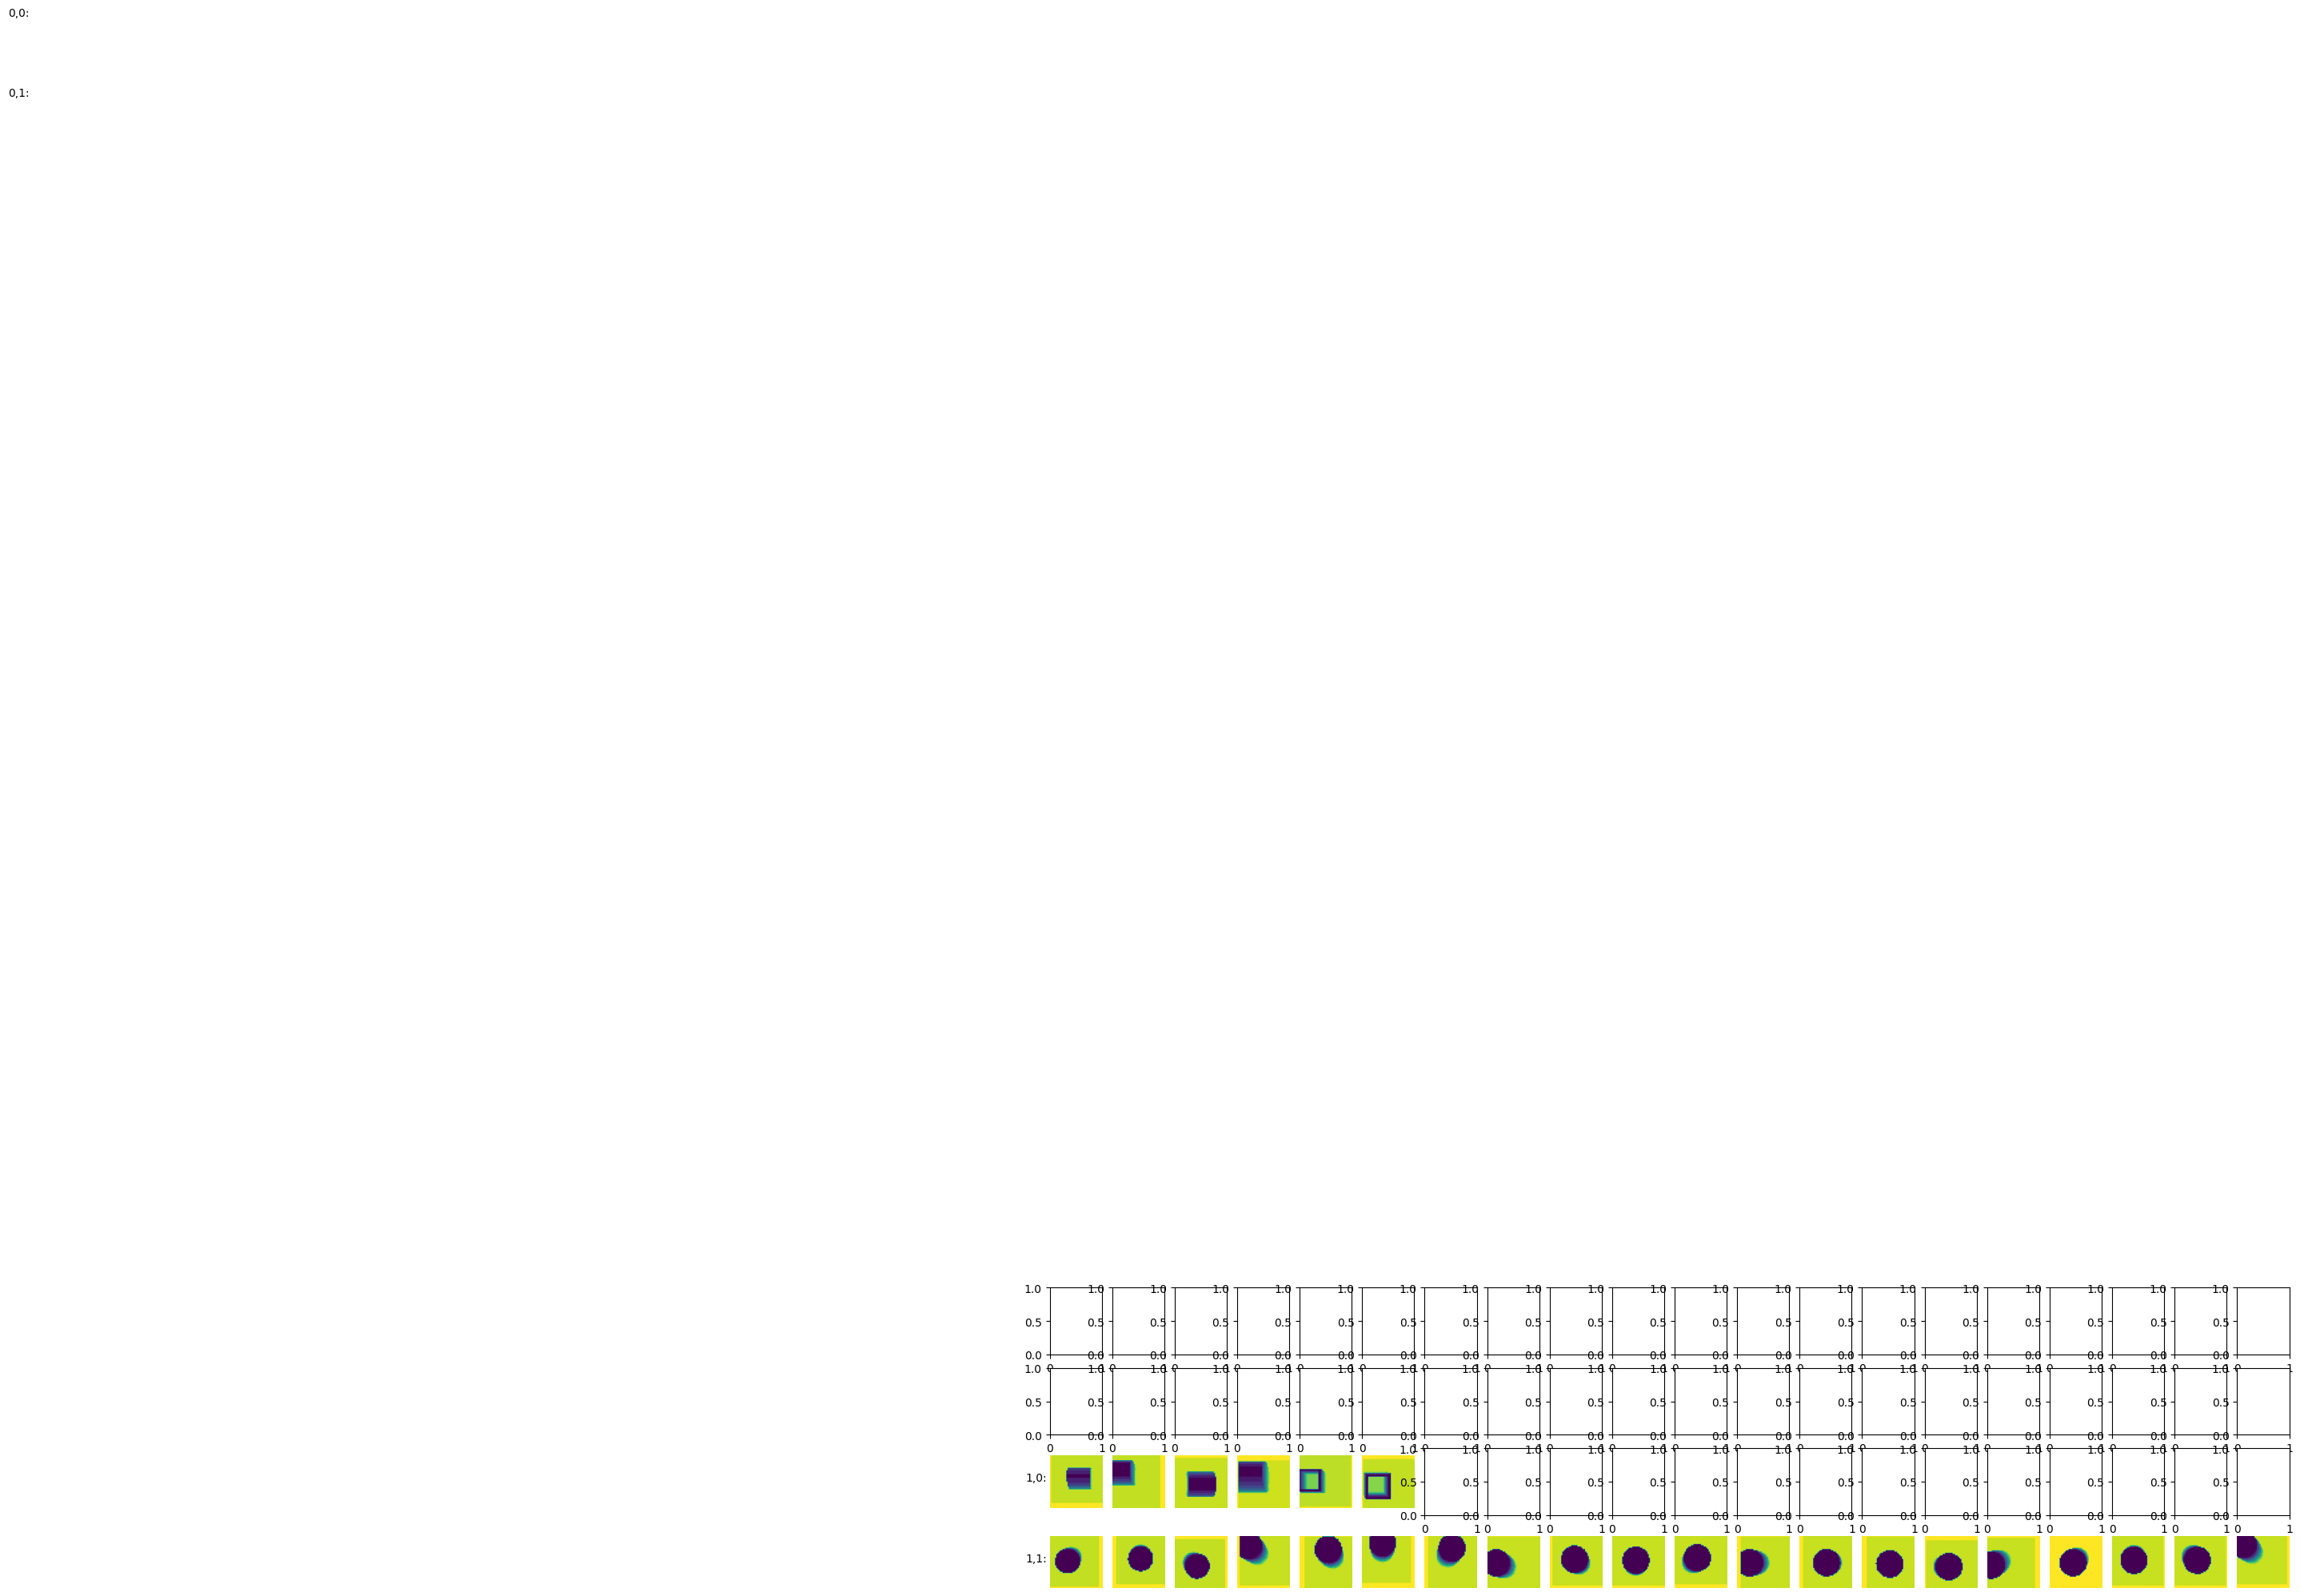

In [12]:
fig, axes = plt.subplots(4,20, figsize=(20, 5))

for i in range(4):
    x = np.random.randint(0, len(images))
    if i == 0:
        idxs = np.where( (symbols[:, 0] == 0) & (symbols[:, 1] == 0))
        axes[i][0].text(-20,20, "0,0:")
        print(idxs[0].shape)
    elif i == 1:
        idxs = np.where( (symbols[:, 0] == 0) & (symbols[:, 1] == 1))
        axes[i][0].text(-20,20, "0,1:")
        print(idxs[0].shape)
            
    elif i == 2:
        idxs = np.where( (symbols[:, 0] == 1) & (symbols[:, 1] == 0))
        axes[i][0].text(-20,20, "1,0:")
        print(idxs[0].shape)

    elif i == 3:
        idxs = np.where( (symbols[:, 0] == 1) & (symbols[:, 1] == 1))
        axes[i][0].text(-20,20, "1,1:")
        print(idxs[0].shape)

    for c, idx in enumerate(idxs[0][len(idxs[0])//2:len(idxs[0])//2+20]):
        axes[i][c].imshow((dataloader.dataset.get_image(idx).numpy()*255))
        axes[i][c].axis("off")        


plt.show()